# URBANMETRY CASE STUDY - Jonathan Chan

### <u> Problem Statement:</u>
House prices are known to change over time due to various factors. The data involved contains transactional records for 5 unique high-rise buildings. The below analysis will focus on price trends across the features of *average price psf, median price psf and the median valuation price*. 

# <u>Table of contents</u><a id='back'></a>

* [1. Data Preprocessing](#dp)
* [2. Exploratory Data Analysis](#eda)
    * [2.1. Average Price Psf x Average Built-Up Size](#eda1)
    * [2.2. Median Price Psf x Avg Price Psf](#eda2)
    * [2.3. Correlation Between Built-Up Size and Price Psf](#eda3)
    * [2.4. Median Valuation Price](#eda4)
* [3. Conclusion](#conclusion)

# 1. Data Preprocessing <a id='dp'></a>

In [1]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading excel 

df = pd.read_excel('DataCaseStudy_JonathanChanMunHeng.xlsx', sheet_name = 'Q2 data')

In [3]:
# Overview

display(df.head())
df.info()

,Id,Property building category,Property building type,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion,Property building category.1,Property building type.1
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981.436464,905,888200,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1049.723757,905,950000,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892.370572,367,327500,2014,20142,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1061.516854,356,377900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059.334126,841,890900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            251 non-null    int64  
 1   Property building category    251 non-null    object 
 2   Property building type        251 non-null    object 
 3   Title                         251 non-null    object 
 4   Built up price psf            251 non-null    float64
 5   Size built up                 251 non-null    int64  
 6   Valuation price               251 non-null    int64  
 7   YEAR                          251 non-null    int64  
 8   QUARTER                       251 non-null    int64  
 9   NAME                          251 non-null    object 
 10  Year completion               251 non-null    int64  
 11  Property building category.1  251 non-null    object 
 12  Property building type.1      251 non-null    object 
dtypes: fl

In [4]:
# Dropping duplicates columns

df.drop(['Property building category.1', 'Property building type.1'], axis=1, inplace=True)

In [5]:
# Renaming columns

df.columns = ['id', 'building_category', 'building_type', 'title', 'price_psf_built_up', 'size_built_up', 
              'valuation_price', 'year', 'quarter', 'name', 'completion_year']

In [6]:
# Converting the Quarter column into a more readable format

df['date_time_quarter'] = pd.to_datetime(df['quarter'].astype(str).str[:-1] + '-' + df['quarter'].astype(str).str[-1] + '-01', format='%Y-%m-%d')
df['quarter'] = df['date_time_quarter'].dt.strftime('%Y-%m')

In [7]:
# Checking for duplicates

df[df.duplicated()]

,id,building_category,building_type,title,price_psf_built_up,size_built_up,valuation_price,year,quarter,name,completion_year,date_time_quarter


In [8]:
# Last check

df.head()

,id,building_category,building_type,title,price_psf_built_up,size_built_up,valuation_price,year,quarter,name,completion_year,date_time_quarter
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981.436464,905,888200,2015,2015-02,ASTRA SUITES,2004,2015-02-01
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1049.723757,905,950000,2015,2015-02,ASTRA SUITES,2004,2015-02-01
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892.370572,367,327500,2014,2014-02,ASTRA SUITES,2004,2014-02-01
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1061.516854,356,377900,2014,2014-04,ASTRA SUITES,2004,2014-04-01
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059.334126,841,890900,2014,2014-04,ASTRA SUITES,2004,2014-04-01


[Back to Contents](#back)

# 2. Exploratory Data Analysis <a id='eda'></a>

In this section, we will filter for the last 4 years of data for a more in-depth analysis, while consolidating all metrics to be studied into a report for visualization.

In [9]:
# Filtering for the last 4 years of data for a more granular analysis

df1 = df.query("date_time_quarter >= '2016-01-01'")

In [10]:
# Creating a condensed report with the necessary statistical metrics to be studied in further sections

report = (df1
          .groupby(['name', 'quarter'], as_index=False)
          .agg({'price_psf_built_up': [np.mean, np.median], 'valuation_price': 'median',
                'building_type': 'min', 'title': 'min', 'size_built_up': [np.mean, np.median], 'completion_year': 'min'})
          .sort_values(by='quarter', ascending=True)
         )
report.columns = report.columns.get_level_values(0)


# Renaming columns
report.columns = ['name', 'quarter', 'mean_price_psf_built_up', 'median_price_psf_built_up', 'median_valuation_price',
                 'building_type', 'title', 'avg_size_built_up', 'median_size_built_up', 'completion_year']

report.head()

,name,quarter,mean_price_psf_built_up,median_price_psf_built_up,median_valuation_price,building_type,title,avg_size_built_up,median_size_built_up,completion_year
0,ASTRA SUITES,2016-01,989.499389,989.499389,810400.0,SERVICE APARTMENT,COMMERCIAL,819.000000,819.0,2004
20,HARBOURVIEW,2016-01,1104.328349,1104.328349,1762500.0,CONDO,RESIDENTIAL,1582.500000,1582.5,1994
28,LILY POINT,2016-01,551.953320,523.262677,574500.0,CONDO,RESIDENTIAL,1098.000000,1098.0,2009
40,RAINBOW APARTMENT,2016-01,769.509982,769.509982,2120000.0,CONDO,RESIDENTIAL,2755.000000,2755.0,1987
11,FLAT JALAN AMAN,2016-01,272.532220,263.929074,150000.0,MEDIUM COST,RESIDENTIAL,586.333333,568.0,1986


## 2.1 Average Price Psf x Average Built-Up Size <a id='eda1'></a>

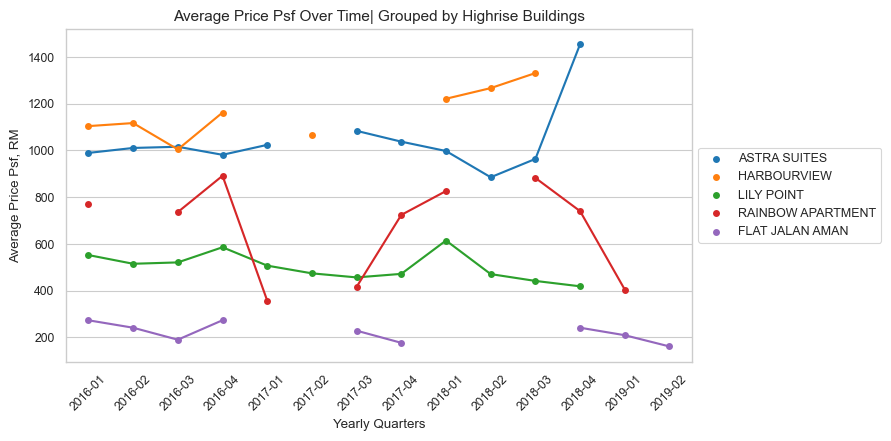

In [11]:
# Plotting a line chart for Average Price Psf across time, grouped by Name

sns.set_style("whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 0.85})

fig = plt.figure(figsize=(9, 4.5))
avg_psf = sns.pointplot(data=report, x='quarter', y='mean_price_psf_built_up', hue='name', markers='o', palette='tab10')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 9})
plt.title('Average Price Psf Over Time| Grouped by Highrise Buildings', fontsize=11)
plt.xlabel('Yearly Quarters')
plt.ylabel('Average Price Psf, RM')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# fig.savefig("plots/avg_price_psf", dpi=200)

> Moving forward, we will take a look at 3 specific highrise buildings, namely **Astra Suites, Lily Point and Flat Jalan Aman**. We would like to investigate further into Astra Suite's spike at the last recorded quarter, while Lily Point has the best data continuity and stability amongst all highrise buildings. Flat Jalan Aman was included as it was the only "Medium Cost" building on our list. As for leaving out the remaining highrise buildings, Rainbow Apartment has very dispersed and anomolous (spikes and dips) data that might prove inconclusive. Similarly with Harbourview, we have a period of missing data as large as 3 quarters. 
*Overall, the chosen highrise buildings allows us to diffrentiate between the characteristics of each unique type of building.* 

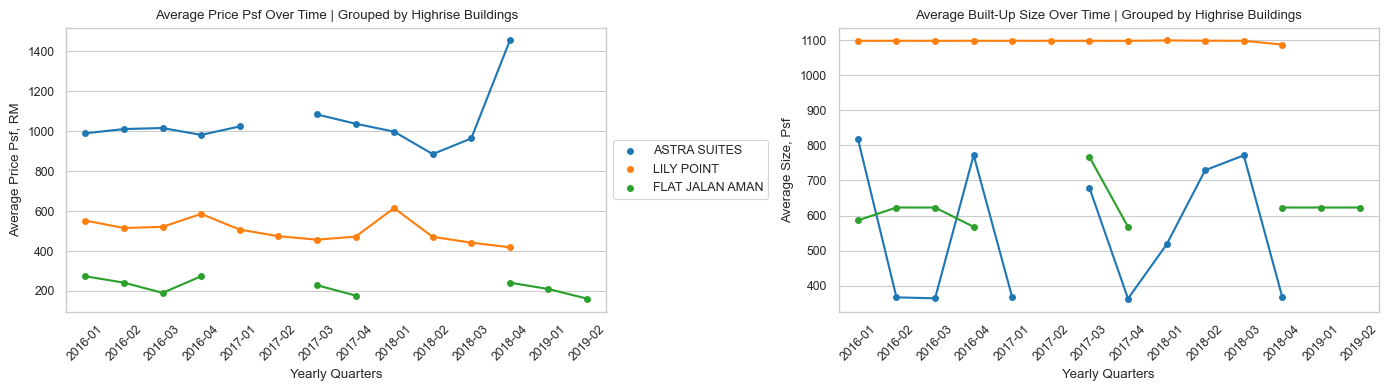

In [12]:
# Filtering for Astra, Lily and Rainbow
report1 = report.query("name == ['ASTRA SUITES', 'LILY POINT', 'FLAT JALAN AMAN']")


# Plotting avg price psf against average size psf
sns.set_style("whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 0.85})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))


sns.pointplot(data=report1, x='quarter', y='mean_price_psf_built_up', hue='name', markers='o', palette='tab10', ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 9})
axes[0].set_title('Average Price Psf Over Time | Grouped by Highrise Buildings')
axes[0].set_xlabel('Yearly Quarters')
axes[0].set_ylabel('Average Price Psf, RM')
axes[0].tick_params(axis='x', rotation=45)

sns.pointplot(data=report1, x='quarter', y='avg_size_built_up', hue='name', markers='o', palette='tab10', ax=axes[1])
axes[1].legend().set_visible(False) 
axes[1].set_title('Average Built-Up Size Over Time | Grouped by Highrise Buildings')
axes[1].set_xlabel('Yearly Quarters')
axes[1].set_ylabel('Average Size, Psf')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  

plt.show()
#fig.savefig("plots/avg_price_vs_size", dpi=200)

**Observations**
> 1. Astra Suites (commercial title) definitely seem like the more premium offering, with its higher overall Average Price Psf, coupled with a low-moderate built-up size. Additionally, being a service apartment with the added benefits of furnishing and connected amenities usually adds monetary value to the building in question. In terms of built-up size, there really aren't any conclusive trends in terms of correlation to the resulting price psf of a unit, thus the only assumption we can make about the huge spike at the last recorded quarter is based on external factors such as the development of surrounding amenities and facilities.
<br><br>
> 2. Lily Point (residential title) appears to be a "run-of-the-mill" condominium with a relatively stable average price psf plot. There aren't any trends or correlations with Average Size, though it does seem to be trending towards depreciation.
<br><br>
> 3. Flat Jalan Aman (residential title) assumes the lowest Average Price Psf and Average Built-Up Size amongst our 2 residential titled buildings, especially being a medium-cost building type. Across an approximate plot over time, this building is also trending towards depreciation. 

[Back to Contents](#back)

## 2.2 Median Price Psf x Avg Price Psf <a id='eda2'></a>

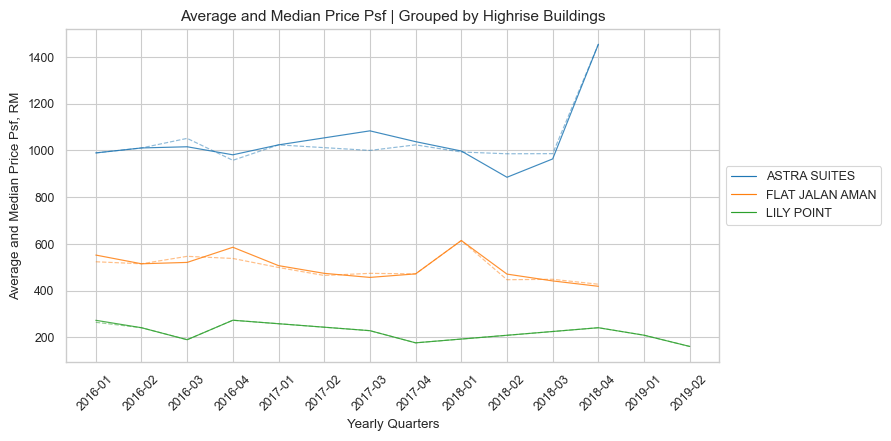

In [13]:
sns.set_style("whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 0.85})

fig, ax = plt.subplots(figsize=(9, 4.5))


mean_plot = sns.lineplot(data=report1, x='quarter', y='mean_price_psf_built_up', 
                         hue='name', markers='o', palette='tab10', alpha=0.85, ax=ax)

median_plot = sns.lineplot(data=report1, x='quarter', y='median_price_psf_built_up', 
                           hue='name', markers='o', palette='tab10', linestyle='dashed', alpha=0.5, ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::len(handles)//len(report['name'].unique())], 
          labels[::len(labels)//len(report1['name'].unique())], loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 9})

plt.title('Average and Median Price Psf | Grouped by Highrise Buildings', fontsize=11)
plt.xlabel('Yearly Quarters')
plt.ylabel('Average and Median Price Psf, RM')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#fig.savefig("plots/median_price_psf", dpi=200)

**Observations**
> The median plotlines (dotted) on Price Psf offers the same observations as before, in that our residential titled buildings are generally trending towards depreciation. However, we do notice some stability in the 1st and 2nd quarter of Astra Suite's 2018 plot, indicating some huge outliers in that period. 

[Back to Contents](#back)

## 2.3 Correlation Between Built-Up Size and Price Psf <a id='eda3'></a>

In [14]:
df2 = df1.query("name == ['ASTRA SUITES', 'LILY POINT', 'FLAT JALAN AMAN']")

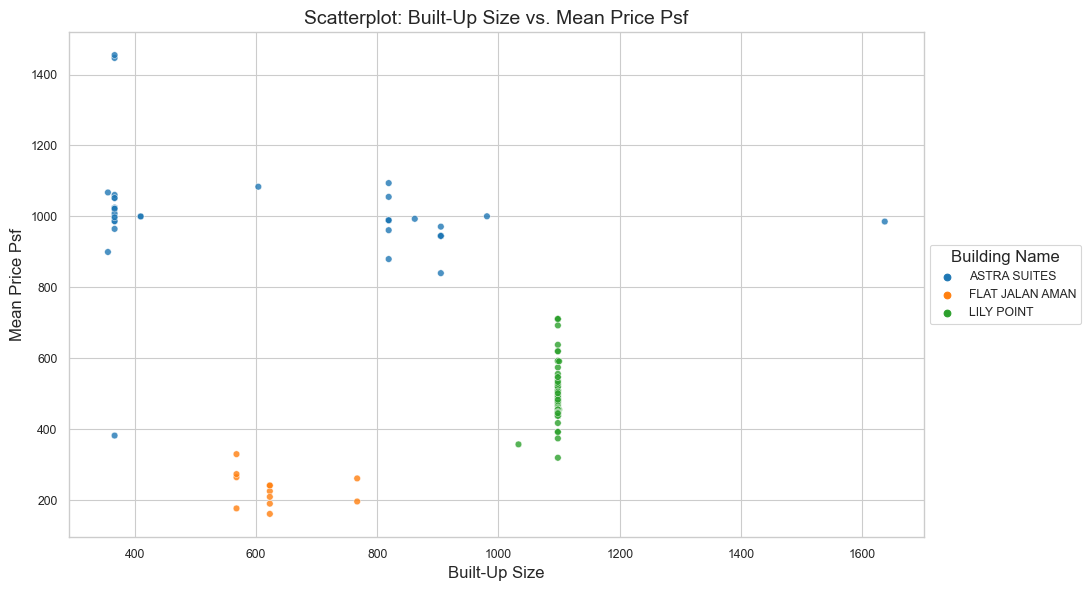

In [15]:
# Creating a scatterplot

sns.set_style("whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 0.85})

fig = plt.figure(figsize=(11, 6))

scatterplot = sns.scatterplot(data=df2, x='size_built_up', y='price_psf_built_up', hue='name', palette='tab10', alpha=0.8)

plt.title('Scatterplot: Built-Up Size vs. Mean Price Psf', fontsize=14)
plt.xlabel('Built-Up Size', fontsize=12)
plt.ylabel('Mean Price Psf', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Building Name', title_fontsize='12')

plt.tight_layout()
plt.show()

#fig.savefig("plots/scatterplot", dpi=200)

In [16]:
# Creating a correlation matrix

astra = df2.query("name == 'ASTRA SUITES'")
aman = df2.query("name == 'FLAT JALAN AMAN'")
lily = df2.query("name == 'LILY POINT'")

print("ASTRA SUITES Correlation Coefficient: ", astra[['size_built_up', 'price_psf_built_up']].corr(method='kendall'))
print()
print("FLAT JALAN AMAN Correlation Coefficient: ", aman[['size_built_up', 'price_psf_built_up']].corr(method='kendall'))
print()
print("LILY POINT Correlation Coefficient:", lily[['size_built_up', 'price_psf_built_up']].corr(method='kendall'))

ASTRA SUITES Correlation Coefficient:                      size_built_up  price_psf_built_up
size_built_up            1.000000           -0.348138
price_psf_built_up      -0.348138            1.000000

FLAT JALAN AMAN Correlation Coefficient:                      size_built_up  price_psf_built_up
size_built_up            1.000000           -0.261785
price_psf_built_up      -0.261785            1.000000

LILY POINT Correlation Coefficient:                     size_built_up  price_psf_built_up
size_built_up            1.000000            0.146984
price_psf_built_up       0.146984            1.000000


**Observations**

Our scatterplot aims to assess the correlational relationship between the built-up size and the resulting price psf. The Kendall Coefficient gives us a way to quantify what we observe in said scatterplot, eventhough the data doesn't meet requirements of linearity or a monotonic relationship.

> Astra Suites seems to have a very dispersed distribution with no unique monotonic pattern, with 2 distinct clusters on the left and in the middle. Our Kendall correlation coefficient indicates a low negative correlation between built-up size and psf price. What we can infer from this is that there isn't a substantial relationship, and if we were to filter out the outliers that we notice on our scatterplot, our coefficient score should tend towards 0 even further.

> Flat Jalan Aman is similar, in the sense that it does not show any monotonic pattern and thus an extremely weak relationship; this is illustrated with a near 0 negative coefficient score.

> Lily Point shows an extremely weak correlation coefficient as well, but tending positively. Again, if we were to remove the outlier near the 1000 sf mark, we should get a near 0 coefficient value, signifying a close to null correlational relationship.

## 2.4 Median Valuation Price <a id='eda4'></a>

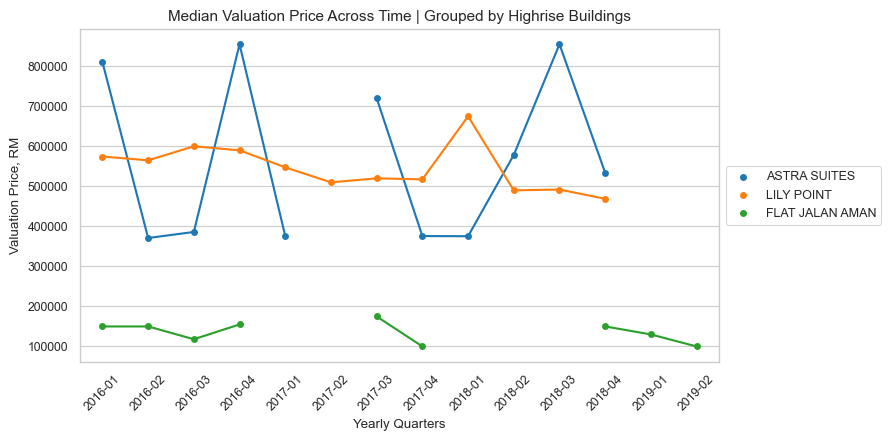

In [17]:
# Plotting a line chart for Average Price Psf across time, filtered by Name

sns.set_style("whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 0.85})

fig = plt.figure(figsize=(9, 4.5))
avg_psf = sns.pointplot(data=report1, x='quarter', y='median_valuation_price', hue='name', markers='o', palette='tab10')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 9})
plt.title('Median Valuation Price Across Time | Grouped by Highrise Buildings', fontsize=11)
plt.xlabel('Yearly Quarters')
plt.ylabel('Valuation Price, RM')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#fig.savefig("plots/valuation_price", dpi=200)

**Observations**

> Astra Suite's plotline appears very erratic, but this is a given, knowing that the building has a wide range of unit sizes. 

> Flat Jalan Aman and Lily Point are similar with respect to range of available unit sizes. One thing to note is that we see an anomalous spike in Lily Point's first 2 quarters of 2018. Other than that, both buildings are on the notable decline in terms of depreciation.

[Back to Contents](#back)

# 3. Conclusion <a id='conclusion'></a>

1. We studied 3 buildings with the best possible data availability that represented either a unique building type and(or) unique building title.

2. Astra Suite's mean, median and valuation plots gave us an understanding that its psf price across time stayed relatively stable and neutral, indicatating the nature of its commercial title combined with good location (and other possible external factors like surrounding amenities and facilities) possibly makes it relatively undettered by depreciation.

3. Flat Jalan Aman and Lily Point's plots inferred to us that the general trend of its value is towards a somewhat linear depreciation, possibly owing to the Malaysian property "supply glut" in the 2018-2019 period, where there was a larger amount of properties being made available (either through sub-sale or new developments) than there were buyers.

4. All 3 highrise buildings shared one thing in common, that is there did not seem to be any noteworthy correlational relationship between the built-up size of a unit and the resulting valuation. Any outliers we saw could potentially only be explained by factors external to the dataset provided.